In [7]:
#from google.colab import drive
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
from sklearn.metrics import adjusted_mutual_info_score
from sklearn.metrics import homogeneity_completeness_v_measure
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN
from sklearn.cluster import MeanShift
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import Birch
from sklearn.model_selection import GridSearchCV, KFold

In [8]:
#Монтирую гугл диск, чтобы взять оттуда датасет
#drive.mount("/Desktop", force_remount=True)

In [10]:
#Загружаю данные с гугл диска
data = pd.read_csv('Desktop/mushrooms.csv', sep=",")

In [11]:
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [12]:
data.size

186852

In [13]:
data.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [14]:
data.dtypes

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

In [15]:
le = LabelEncoder()

In [33]:
cols_x = ['cap-shape', 'cap-surface', 'cap-color', 'bruises', 
          'odor', 'gill-attachment', 'gill-spacing', 'gill-size',
          'gill-color', 'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
          'stalk-surface-below-ring', 'stalk-color-above-ring', 
          'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number', 
          'ring-type', 'spore-print-color', 'population', 'habitat']
col_y = 'class'

In [17]:
for i in cols_x:
  data[i] = le.fit_transform(data[[i]])
data['class'] = le.fit_transform(data[['class']])

/Users/margarita/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/margarita/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/margarita/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/margarita/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array w

In [18]:
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [19]:
for i in cols_x2:
  print(data[i].unique())

NameError: name 'cols_x2' is not defined

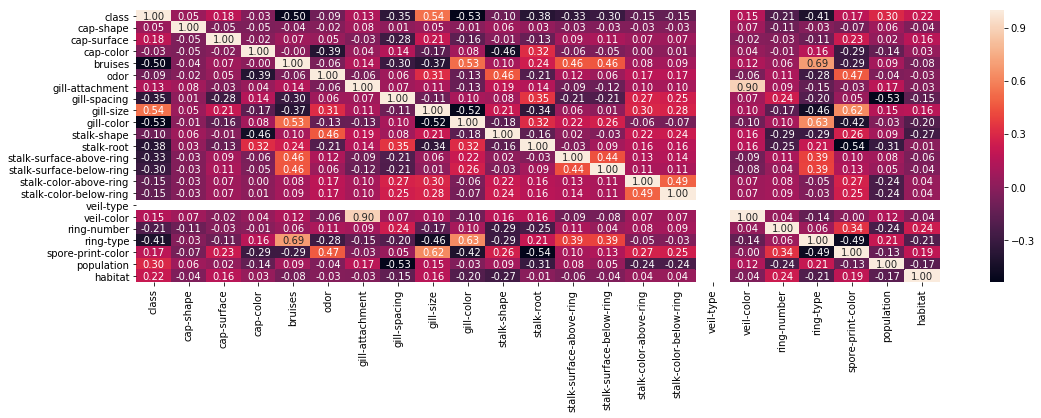

In [20]:
plt.figure(figsize = (18,5))
sns.heatmap(data.corr(method='pearson'), annot=True, fmt='.2f', square=False)

In [21]:
cols_x2 = ['bruises', 'gill-spacing', 'gill-size', 'gill-color',  'stalk-root', 
           'stalk-surface-above-ring', 'stalk-surface-below-ring', 'ring-type', 
           'population', ]

DBSCAN

In [22]:
X = data[cols_x2]
Y = data[col_y]

In [23]:
temp_cluster_db = DBSCAN(eps=0.99).fit_predict(X)

In [24]:
ari = adjusted_rand_score(Y, temp_cluster_db)
ami = adjusted_mutual_info_score(Y, temp_cluster_db)
h, c, v = homogeneity_completeness_v_measure(Y, temp_cluster_db)
sl = silhouette_score(X, temp_cluster_db)
print('''ARI: {0}, 
AMI:{1}, 
Homogeneity:{2}, 
Completeness: {3}, 
V-measure: {4}, 
Silhouette:{5}'''.format(ari, ami, h, c, v, sl))

/Users/margarita/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


ARI: 0.045137012766120144, 
AMI:0.15358923643298394, 
Homogeneity:0.9728493007154457, 
Completeness: 0.15573378177437797, 
V-measure: 0.26848798825290127, 
Silhouette:0.9998172438350283


Mean Shift

In [25]:
temp_cluster_ms = MeanShift().fit_predict(X)

In [26]:
ari = adjusted_rand_score(Y, temp_cluster_ms)
ami = adjusted_mutual_info_score(Y, temp_cluster_ms)
h, c, v = homogeneity_completeness_v_measure(Y, temp_cluster_ms)
sl = silhouette_score(X, temp_cluster_ms)
print('''ARI: {0}, 
AMI:{1}, 
Homogeneity:{2}, 
Completeness: {3}, 
V-measure: {4}, 
Silhouette: {5}'''.format(ari, ami, h, c, v, sl))

/Users/margarita/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


ARI: 0.3069603675011273, 
AMI:0.28856523801640643, 
Homogeneity:0.39129684154183636, 
Completeness: 0.2886585628469996, 
V-measure: 0.33223115279908827, 
Silhouette: 0.4531091565478523


Birch

In [27]:
temp_cluster_br = Birch().fit_predict(X)

In [28]:
ari = adjusted_rand_score(Y, temp_cluster_br)
ami = adjusted_mutual_info_score(Y, temp_cluster_br)
h, c, v = homogeneity_completeness_v_measure(Y, temp_cluster_br)
sl = silhouette_score(X, temp_cluster_br)
print('''ARI: {0}, 
AMI:{1}, 
Homogeneity:{2}, 
Completeness: {3}, 
V-measure: {4}, 
Silhouette: {5}'''.format(ari, ami, h, c, v, sl))

/Users/margarita/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


ARI: 0.30438499877111097, 
AMI:0.269229255154706, 
Homogeneity:0.361660376699665, 
Completeness: 0.26932602881101514, 
V-measure: 0.30873740601743555, 
Silhouette: 0.462697384729021


In [29]:
n_range_br = np.array(np.arange(0.01,1,0.1))
tuned_parameters_br = [{'threshold': n_range_br}]
tuned_parameters_br

[{'threshold': array([0.01, 0.11, 0.21, 0.31, 0.41, 0.51, 0.61, 0.71, 0.81, 0.91])}]

In [30]:
br_gs = GridSearchCV(Birch(), tuned_parameters_br, cv=KFold(n_splits=5), scoring='adjusted_mutual_info_score')
br_gs.fit(data[cols_x2], data[col_y])
br_gs.best_params_

/Users/margarita/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
/Users/margarita/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
/Users/margarita/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
/Users/margarita/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match t

/Users/margarita/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
/Users/margarita/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
/Users/margarita/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
/Users/margarita/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match t

/Users/margarita/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
/Users/margarita/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
/Users/margarita/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
/Users/margarita/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match t

/Users/margarita/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
/Users/margarita/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
/Users/margarita/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)
/Users/margarita/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match t

{'threshold': 0.91}

In [31]:
temp_cluster_br_gs = br_gs.best_estimator_.fit_predict(X)

In [32]:
ari = adjusted_rand_score(Y, temp_cluster_br_gs)
ami = adjusted_mutual_info_score(Y, temp_cluster_br_gs)
h, c, v = homogeneity_completeness_v_measure(Y, temp_cluster_br_gs)
sl = silhouette_score(X, temp_cluster_br_gs)
print('''ARI: {0}, 
AMI:{1}, 
Homogeneity:{2}, 
Completeness: {3}, 
V-measure: {4}, 
Silhouette: {5}'''.format(ari, ami, h, c, v, sl))

/Users/margarita/anaconda3/lib/python3.7/site-packages/sklearn/metrics/cluster/supervised.py:732: FutureWarning: The behavior of AMI will change in version 0.22. To match the behavior of 'v_measure_score', AMI will use average_method='arithmetic' by default.
  FutureWarning)


ARI: 0.13627703099355284, 
AMI:0.1765824873001168, 
Homogeneity:0.20769636588400608, 
Completeness: 0.1767070717384534, 
V-measure: 0.1909525932082184, 
Silhouette: 0.2787015966914067
